In [1]:
import pandas as pd

In [81]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [82]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [84]:
X=df.drop('Purchased',axis=1)
y=df['Purchased']

In [67]:
# drop user id column
X=X.drop('User ID',axis=1)

In [85]:
X

,User ID,Gender,Age,EstimatedSalary
0,15624510,Male,19,19000
1,15810944,Male,35,20000
2,15668575,Female,26,43000
3,15603246,Female,27,57000
4,15804002,Male,19,76000
...,...,...,...,...
395,15691863,Female,46,41000
396,15706071,Male,51,23000
397,15654296,Female,50,20000
398,15755018,Male,36,33000


In [86]:
#convert gender to numeric:
X['Gender']=X['Gender'].map({'Male':0,'Female':1}).astype(int)

In [87]:
X

,User ID,Gender,Age,EstimatedSalary
0,15624510,0,19,19000
1,15810944,0,35,20000
2,15668575,1,26,43000
3,15603246,1,27,57000
4,15804002,0,19,76000
...,...,...,...,...
395,15691863,1,46,41000
396,15706071,0,51,23000
397,15654296,1,50,20000
398,15755018,0,36,33000


In [88]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [89]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=430)

In [90]:
model=LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [91]:
#checking accuracy on test set:
model.score(X,y)

0.775

In [102]:
# get predictions on test set for creating confusion matrix:
y_pred=model.predict(X_test)

In [103]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [104]:
#confusion matrix code:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[72,  4],
       [24, 20]])

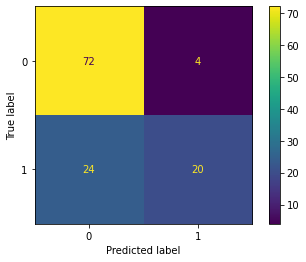

In [105]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [106]:
from sklearn.metrics import recall_score, precision_score, f1_score
prec=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)

In [107]:
print("Precision:{},\nRecall:{} \n F1-Score:{}".format(prec,recall,f1))

Precision:0.8333333333333334,
Recall:0.45454545454545453 
 F1-Score:0.5882352941176471
